In [1]:
import numpy as np
import pickle
import math
from scipy.stats import sem
import matplotlib.pyplot as plt
import pandas as pd
import time
import pprint
import seaborn as sns
import statsmodels.formula.api as smf
import CMR_IA as cmr
import scipy as sp
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.size"] = 16

In [2]:
with open("simu7_data/simu7_design.pkl", 'rb') as inp:
    df_study = pickle.load(inp)
    df_test = pickle.load(inp)
# df_study = df_study.loc[df_study.session < 500]
# df_test = df_test.loc[df_test.session < 500]

In [3]:
df_study

,study_itemno1,study_itemno2,study_item1,study_item2,serial_pos,list,session
0,110,1083,BED,PLANT,0,0,0
1,1262,1627,SEAL,WRITER,1,0,0
2,738,1198,INMATE,ROBE,2,0,0
3,187,748,BUG,JAM,3,0,0
4,1423,1072,SWORD,PIN,4,0,0
...,...,...,...,...,...,...,...
191995,187,1314,BUG,SKELETON,7,15,999
191996,1438,1433,TAXI,TAPE,8,15,999
191997,1537,1489,UNDERWEAR,TOWEL,9,15,999
191998,386,283,COUCH,CHAUFFEUR,10,15,999


In [4]:
df_test

,test_itemno,test_item,correct_ans,study_pos,test_dir,list,session
0,324,CLIPPERS,823,9,1,0,0
1,1347,SPARROW,1051,8,1,0,0
2,413,CROSS,524,7,0,0,0
3,812,LEOPARD,1323,5,0,0,0
4,110,BED,1083,0,0,0,0
...,...,...,...,...,...,...,...
127995,947,NEUTRON,402,11,0,15,999
127996,467,DINER,1441,2,1,15,999
127997,1444,TEENAGER,1014,4,0,15,999
127998,1489,TOWEL,1537,9,1,15,999


### Run CMR-IA

In [5]:
s_mat = np.load('../../Data/wordpools/ltp_FR_similarity_matrix.npy')

In [6]:
params = cmr.make_default_params()
params.update(
    beta_enc = 0.5,
    beta_rec = 0.1,
    beta_cue = 0.5,
    beta_distract = 0.1,
    beta_rec_post = 0.1,
    gamma_fc = 0.4,  
    gamma_cf = 0.6,  # cf - fc Higher, ILI +1 Higher
    s_fc = 0.2,
    s_cf = 0.2,
    c_thresh = 0.01,
    kappa = 0.08,
    lamb = 0.04,
    eta = 0.02,
    omega = 5,  # this is important for increasing PLI num
    alpha = 1,
    phi_s = 0.5,
    phi_d = 0.5,
    nitems_in_accumulator = 48,
    d_ass = 0.8
)
params

{'beta_enc': 0.5,
 'beta_rec': 0.1,
 'beta_cue': 0.5,
 'beta_rec_post': 0.1,
 'beta_distract': 0.1,
 'phi_s': 0.5,
 'phi_d': 0.5,
 's_cf': 0.2,
 's_fc': 0.2,
 'kappa': 0.08,
 'eta': 0.02,
 'omega': 5,
 'alpha': 1,
 'c_thresh': 0.01,
 'c_thresh_itm': 0.5,
 'c_thresh_ass': 0.5,
 'd_ass': 0.8,
 'lamb': 0.04,
 'rec_time_limit': 60000.0,
 'dt': 10,
 'nitems_in_accumulator': 48,
 'max_recalls': 50,
 'learn_while_retrieving': False,
 'a': 2800,
 'b': 20,
 'm': 0,
 'n': 1,
 'c1': 0,
 'thresh_sigma': 0,
 'No_recall': None,
 'var_enc': 1,
 'bad_enc_ratio': 1,
 'gamma_fc': 0.4,
 'gamma_cf': 0.6}

In [7]:
df_simu, f_in, f_dif = cmr.run_norm_cr_multi_sess(params,df_study, df_test ,s_mat)
df_simu

CMR2 Time: 630.4293413162231


,list,session,test_itemno,s_resp,s_rt,csim
0,0,0,324,823.0,1540.0,0.852134
1,0,0,1347,1051.0,1900.0,0.795432
2,0,0,413,524.0,1590.0,0.845137
3,0,0,812,879.0,1680.0,0.698786
4,0,0,110,679.0,2440.0,0.693032
...,...,...,...,...,...,...
127995,15,999,947,402.0,3690.0,0.835148
127996,15,999,467,-1.0,-1.0,-1.000000
127997,15,999,1444,-1.0,-1.0,-1.000000
127998,15,999,1489,1537.0,4240.0,0.853900


In [8]:
df_simu = df_simu.merge(df_test,on=['session','list','test_itemno'])
df_simu['correct'] = df_simu.s_resp == df_simu.correct_ans
df_simu

,list,session,test_itemno,s_resp,s_rt,csim,test_item,correct_ans,study_pos,test_dir,correct
0,0,0,324,823.0,1540.0,0.852134,CLIPPERS,823,9,1,True
1,0,0,1347,1051.0,1900.0,0.795432,SPARROW,1051,8,1,True
2,0,0,413,524.0,1590.0,0.845137,CROSS,524,7,0,True
3,0,0,812,879.0,1680.0,0.698786,LEOPARD,1323,5,0,False
4,0,0,110,679.0,2440.0,0.693032,BED,1083,0,0,False
...,...,...,...,...,...,...,...,...,...,...,...
127995,15,999,947,402.0,3690.0,0.835148,NEUTRON,402,11,0,True
127996,15,999,467,-1.0,-1.0,-1.000000,DINER,1441,2,1,False
127997,15,999,1444,-1.0,-1.0,-1.000000,TEENAGER,1014,4,0,False
127998,15,999,1489,1537.0,4240.0,0.853900,TOWEL,1537,9,1,True


In [9]:
sessions = np.unique(df_simu.session)
nlist = len(np.unique(df_simu.list))
resp_study_list = []
resp_study_pos = []
for sess in sessions:
    
    pres_words = df_study.loc[df_study.session == sess, ['study_itemno1','study_itemno2']].to_numpy()
    pres_words = np.reshape(pres_words,(nlist,-1,2))
    responses = df_simu.loc[df_simu.session == sess, 's_resp']

    for r in responses:
        if r == -1:
            r_list = None
            r_pos = None
        else:
            r_list = np.where(pres_words==r)[0].item()
            r_pos = np.where(pres_words==r)[1].item()
        resp_study_list.append(r_list)
        resp_study_pos.append(r_pos)

df_simu['resp_study_list'] = resp_study_list
df_simu['resp_study_pos'] = resp_study_pos
df_simu

,list,session,test_itemno,s_resp,s_rt,csim,test_item,correct_ans,study_pos,test_dir,correct,resp_study_list,resp_study_pos
0,0,0,324,823.0,1540.0,0.852134,CLIPPERS,823,9,1,True,0.0,9.0
1,0,0,1347,1051.0,1900.0,0.795432,SPARROW,1051,8,1,True,0.0,8.0
2,0,0,413,524.0,1590.0,0.845137,CROSS,524,7,0,True,0.0,7.0
3,0,0,812,879.0,1680.0,0.698786,LEOPARD,1323,5,0,False,0.0,6.0
4,0,0,110,679.0,2440.0,0.693032,BED,1083,0,0,False,0.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
127995,15,999,947,402.0,3690.0,0.835148,NEUTRON,402,11,0,True,15.0,11.0
127996,15,999,467,-1.0,-1.0,-1.000000,DINER,1441,2,1,False,NaN,NaN
127997,15,999,1444,-1.0,-1.0,-1.000000,TEENAGER,1014,4,0,False,NaN,NaN
127998,15,999,1489,1537.0,4240.0,0.853900,TOWEL,1537,9,1,True,15.0,9.0


In [10]:
df_simu['list_lag'] = df_simu['resp_study_list'] - df_simu['list']
df_simu['pos_lag'] = df_simu['resp_study_pos'] - df_simu['study_pos']

def which_intrusion(x):
    x_list_lag = x['list_lag']
    x_pos_lag = x['pos_lag']

    if math.isnan(x_list_lag):
        return 'NoResp'
    elif x_list_lag == 0 and x_pos_lag == 0:
        return 'Correct'
    elif x_list_lag != 0:
        return 'PLI'
    elif x_list_lag == 0 and x_pos_lag != 0:
        return 'ILI'
    else:
        return 'Else'

df_simu['intrusion_type'] = df_simu.apply(lambda x:which_intrusion(x),axis=1)
df_simu

,list,session,test_itemno,s_resp,s_rt,csim,test_item,correct_ans,study_pos,test_dir,correct,resp_study_list,resp_study_pos,list_lag,pos_lag,intrusion_type
0,0,0,324,823.0,1540.0,0.852134,CLIPPERS,823,9,1,True,0.0,9.0,0.0,0.0,Correct
1,0,0,1347,1051.0,1900.0,0.795432,SPARROW,1051,8,1,True,0.0,8.0,0.0,0.0,Correct
2,0,0,413,524.0,1590.0,0.845137,CROSS,524,7,0,True,0.0,7.0,0.0,0.0,Correct
3,0,0,812,879.0,1680.0,0.698786,LEOPARD,1323,5,0,False,0.0,6.0,0.0,1.0,ILI
4,0,0,110,679.0,2440.0,0.693032,BED,1083,0,0,False,0.0,6.0,0.0,6.0,ILI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127995,15,999,947,402.0,3690.0,0.835148,NEUTRON,402,11,0,True,15.0,11.0,0.0,0.0,Correct
127996,15,999,467,-1.0,-1.0,-1.000000,DINER,1441,2,1,False,NaN,NaN,NaN,NaN,NoResp
127997,15,999,1444,-1.0,-1.0,-1.000000,TEENAGER,1014,4,0,False,NaN,NaN,NaN,NaN,NoResp
127998,15,999,1489,1537.0,4240.0,0.853900,TOWEL,1537,9,1,True,15.0,9.0,0.0,0.0,Correct


In [11]:
# clean list 1
df_simu = df_simu.query("list > 0")
df_simu

,list,session,test_itemno,s_resp,s_rt,csim,test_item,correct_ans,study_pos,test_dir,correct,resp_study_list,resp_study_pos,list_lag,pos_lag,intrusion_type
8,1,0,1141,506.0,2000.0,0.803298,PUMP,1248,10,1,False,1.0,11.0,0.0,1.0,ILI
9,1,0,1540,1534.0,2210.0,0.718268,UNIVERSE,232,9,0,False,1.0,11.0,0.0,2.0,ILI
10,1,0,528,232.0,1690.0,0.823721,EMERALD,1590,8,1,False,1.0,9.0,0.0,1.0,ILI
11,1,0,506,1119.0,2990.0,0.458566,DUNE,1534,11,0,False,1.0,0.0,0.0,-11.0,ILI
12,1,0,844,396.0,1590.0,0.818980,LOOP,396,5,1,True,1.0,5.0,0.0,0.0,Correct
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127995,15,999,947,402.0,3690.0,0.835148,NEUTRON,402,11,0,True,15.0,11.0,0.0,0.0,Correct
127996,15,999,467,-1.0,-1.0,-1.000000,DINER,1441,2,1,False,NaN,NaN,NaN,NaN,NoResp
127997,15,999,1444,-1.0,-1.0,-1.000000,TEENAGER,1014,4,0,False,NaN,NaN,NaN,NaN,NoResp
127998,15,999,1489,1537.0,4240.0,0.853900,TOWEL,1537,9,1,True,15.0,9.0,0.0,0.0,Correct


In [12]:
df_simu.head(12)

,list,session,test_itemno,s_resp,s_rt,csim,test_item,correct_ans,study_pos,test_dir,correct,resp_study_list,resp_study_pos,list_lag,pos_lag,intrusion_type
8,1,0,1141,506.0,2000.0,0.803298,PUMP,1248,10,1,False,1.0,11.0,0.0,1.0,ILI
9,1,0,1540,1534.0,2210.0,0.718268,UNIVERSE,232,9,0,False,1.0,11.0,0.0,2.0,ILI
10,1,0,528,232.0,1690.0,0.823721,EMERALD,1590,8,1,False,1.0,9.0,0.0,1.0,ILI
11,1,0,506,1119.0,2990.0,0.458566,DUNE,1534,11,0,False,1.0,0.0,0.0,-11.0,ILI
12,1,0,844,396.0,1590.0,0.818980,LOOP,396,5,1,True,1.0,5.0,0.0,0.0,Correct
13,1,0,586,1446.0,2230.0,0.858638,FLY,1446,4,1,True,1.0,4.0,0.0,0.0,Correct
14,1,0,1093,35.0,1820.0,0.849471,POCKET,35,2,0,True,1.0,2.0,0.0,0.0,Correct
15,1,0,666,456.0,1950.0,0.846187,GROUND,456,3,0,True,1.0,3.0,0.0,0.0,Correct
16,2,0,173,414.0,2690.0,0.885526,BRIDE,414,10,0,True,2.0,10.0,0.0,0.0,Correct
17,2,0,492,1636.0,2140.0,0.555382,DRAGON,845,11,0,False,2.0,1.0,0.0,-10.0,ILI


In [13]:
df_simu.groupby("intrusion_type")["list"].count()

intrusion_type
Correct    56974
ILI        40216
NoResp     20975
PLI         1835
Name: list, dtype: int64

In [14]:
# correct rate
sum(df_simu.correct)/len(df_simu.correct)

0.47478333333333333

In [28]:
df_simu.to_pickle("simu7_data/simu7_result.pkl")

In [ ]:
# sessions = df_simu.session.to_numpy()
# for sess in sessions:
#     df_tmp = df_study.loc[df_study.session == sess]
#     tmp1 = df_tmp.study_itemno1.to_numpy()
#     tmp2 = df_tmp.study_itemno2.to_numpy()
#     tmp = np.concatenate((tmp1, tmp2))
#     tmp = np.sort(tmp)
#     testid = np.searchsorted(tmp, df_simu.test_itemno[sess].item())
#     corrid = np.searchsorted(tmp, df_simu.correct_ans[sess].item())
#     df_simu.loc[df_simu.session == sess, 'corr_fin']= f_in[sess][corrid]
#     df_simu.loc[df_simu.session == sess, 'omean_fin'] = np.mean(np.delete(f_in[sess], [testid,corrid]))
#     df_simu.loc[df_simu.session == sess, 'omax_fin'] = np.delete(f_in[sess], [testid,corrid]).max()
# df_simu

In [16]:
# df_fin = df_simu.groupby('lag')['corr_fin','omean_fin','omax_fin'].mean().reset_index()
# df_fin['dif'] = df_fin['corr_fin'] - df_fin['omax_fin']
# df_fin

In [17]:
# sns.lineplot(data=df_fin, x='lag', y='corr_fin', linewidth=2, marker='o', markersize = 7)
# sns.lineplot(data=df_fin, x='lag', y='omean_fin', linewidth=2, marker='o', markersize = 7)
# sns.lineplot(data=df_fin, x='lag', y='omax_fin', linewidth=2, marker='o', markersize = 7)
# # plt.ylim([0,1])
# plt.xlabel('Test Lag')
# plt.ylabel('f_in')
# # plt.savefig('fig/simu3_hr.pdf')
# plt.show()

In [18]:
# sns.lineplot(data=df_fin, x='lag', y='dif', linewidth=2, marker='o', markersize = 7)
# # plt.ylim([0,1])
# plt.xlabel('Test Lag')
# plt.ylabel('f_in')
# # plt.savefig('fig/simu3_hr.pdf')
# plt.show()

### PLI

In [29]:
with open("simu7_data/simu7_result.pkl", 'rb') as inp:
    df_simu = pickle.load(inp)

In [31]:
df_PLI = df_simu.query("intrusion_type == 'PLI' and list > 5")
# df_PLI = df_simu.query("intrusion_type == 'PLI'")
PLI_num = df_PLI.shape[0]
df_PLIgp = df_PLI.groupby("list_lag")['test_item'].count().to_frame(name='PLI_cnt').reset_index()
df_PLIgp['list_abs_lag'] = np.abs(df_PLIgp['list_lag'])
df_PLIgp['PLI_prob'] = df_PLIgp['PLI_cnt'] / PLI_num
df_PLIgp

,list_lag,PLI_cnt,list_abs_lag,PLI_prob
0,-14.0,1,14.0,0.000707
1,-13.0,5,13.0,0.003536
2,-12.0,6,12.0,0.004243
3,-11.0,10,11.0,0.007072
4,-10.0,24,10.0,0.016973
5,-9.0,40,9.0,0.028289
6,-8.0,39,8.0,0.027581
7,-7.0,76,7.0,0.053748
8,-6.0,90,6.0,0.063649
9,-5.0,113,5.0,0.079915


In [32]:
df_PLI

,list,session,test_itemno,s_resp,s_rt,csim,test_item,correct_ans,study_pos,test_dir,correct,resp_study_list,resp_study_pos,list_lag,pos_lag,intrusion_type
72,9,0,546,643.0,3640.0,0.547566,EYELASH,1180,6,0,False,7.0,0.0,-2.0,-6.0,PLI
107,13,0,714,1628.0,3980.0,0.509253,HOOD,731,6,0,False,1.0,0.0,-12.0,-6.0,PLI
108,13,0,784,579.0,3240.0,0.584700,KNEE,516,8,0,False,11.0,1.0,-2.0,-7.0,PLI
215,10,1,976,93.0,1810.0,0.523782,OMELET,12,11,0,False,9.0,0.0,-1.0,-11.0,PLI
241,14,1,539,1106.0,3790.0,0.619540,ESCALATOR,494,9,0,False,7.0,0.0,-7.0,-9.0,PLI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127819,9,998,924,955.0,3200.0,0.536488,MOUNTAIN,494,11,0,False,6.0,0.0,-3.0,-11.0,PLI
127826,10,998,1136,629.0,2490.0,0.518879,PUBLICATION,16,3,1,False,5.0,0.0,-5.0,-3.0,PLI
127836,11,998,122,657.0,3050.0,0.632922,BERRY,557,9,1,False,10.0,1.0,-1.0,-8.0,PLI
127927,6,999,864,420.0,4400.0,0.594320,MANSION,1176,7,1,False,2.0,1.0,-4.0,-6.0,PLI


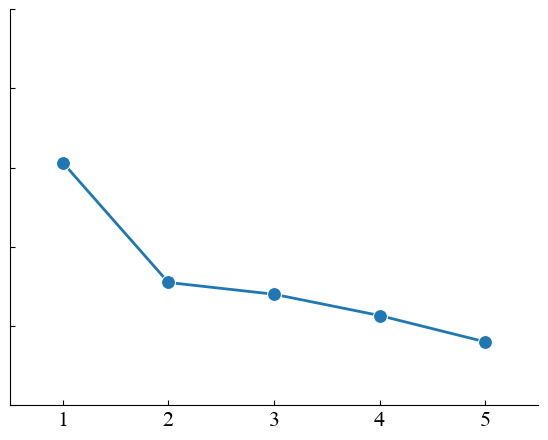

In [40]:
fig, ax = plt.subplots(figsize=(6,4.5))
fig.subplots_adjust(left=0.1, right=0.98, bottom=0.1, top=0.98)

ax.spines[['right', 'top']].set_visible(False)
ax.tick_params(axis="y",direction="in")
ax.tick_params(axis="x",direction="in")
sns.lineplot(data=df_PLIgp.query("list_abs_lag < 6"), x='list_abs_lag', y='PLI_prob', linewidth=2, marker='o', markersize = 10)
plt.ylim([0,0.5])
plt.xlim([0.5,5.5])
plt.xticks(ticks=np.arange(1,6))
plt.xlabel('Lag')
plt.ylabel('Intrusion Conditional Response Probablility')
ax.set(xlabel=None, ylabel=None)
plt.tick_params(labelleft=False)

plt.savefig('simu7_fig/simu7_PLI.pdf')
plt.show()

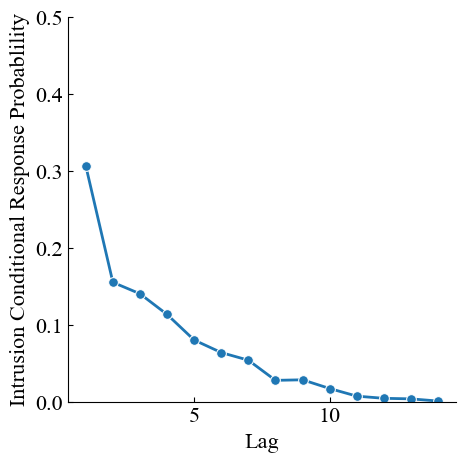

In [34]:
fig,ax = plt.subplots(figsize=(5,5))
ax.spines[['right', 'top']].set_visible(False)
ax.tick_params(axis="y",direction="in")
ax.tick_params(axis="x",direction="in")
sns.lineplot(data=df_PLIgp, x='list_abs_lag', y='PLI_prob', linewidth=2, marker='o', markersize = 7)
plt.ylim([0,0.5])
# plt.xlim([0.5,5.5])
# plt.xticks(ticks=np.arange(1,6))
plt.xlabel('Lag')
plt.ylabel('Intrusion Conditional Response Probablility')
# plt.savefig('fig/simu7_PLI.pdf')
plt.show()

### ILI

In [23]:
df_ILI = df_simu.query("intrusion_type == 'ILI'")
df_ILI

,list,session,test_itemno,s_resp,s_rt,csim,test_item,correct_ans,study_pos,test_dir,correct,resp_study_list,resp_study_pos,list_lag,pos_lag,intrusion_type
8,1,0,1141,506.0,2000.0,0.803298,PUMP,1248,10,1,False,1.0,11.0,0.0,1.0,ILI
9,1,0,1540,1534.0,2210.0,0.718268,UNIVERSE,232,9,0,False,1.0,11.0,0.0,2.0,ILI
10,1,0,528,232.0,1690.0,0.823721,EMERALD,1590,8,1,False,1.0,9.0,0.0,1.0,ILI
11,1,0,506,1119.0,2990.0,0.458566,DUNE,1534,11,0,False,1.0,0.0,0.0,-11.0,ILI
17,2,0,492,1636.0,2140.0,0.555382,DRAGON,845,11,0,False,2.0,1.0,0.0,-10.0,ILI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127979,13,999,1589,89.0,3980.0,0.697543,WARRIOR,922,3,1,False,13.0,2.0,0.0,-1.0,ILI
127980,13,999,70,1285.0,3620.0,0.614558,BAIT,1085,6,0,False,13.0,0.0,0.0,-6.0,ILI
127987,14,999,1356,480.0,2280.0,0.633756,SPOOL,1637,9,0,False,14.0,0.0,0.0,-9.0,ILI
127990,14,999,480,1015.0,2560.0,0.723489,DOG,10,0,1,False,14.0,1.0,0.0,1.0,ILI


In [24]:
df_ILI.groupby("list")["pos_lag"].mean()

list
1    -1.837356
2    -2.083169
3    -2.079814
4    -2.037991
5    -2.216937
6    -2.160534
7    -2.009205
8    -2.148777
9    -2.234343
10   -2.249075
11   -2.169052
12   -1.990402
13   -2.264734
14   -2.181375
15   -2.197115
Name: pos_lag, dtype: float64

In [25]:
possible_ILI_cnt = {}
for pair_pos in df_ILI.study_pos:
    l_bound = -pair_pos
    r_bound = 11 - pair_pos
    for i in np.arange(l_bound, r_bound + 1):
        if i in possible_ILI_cnt:
            possible_ILI_cnt[i] += 1
        else:
            possible_ILI_cnt[i] = 1
possible_ILI_cnt

{-10: 5776,
 -9: 9402,
 -8: 13130,
 -7: 16839,
 -6: 20603,
 -5: 24461,
 -4: 28331,
 -3: 32072,
 -2: 35473,
 -1: 38130,
 0: 40216,
 1: 37645,
 2: 34440,
 3: 30814,
 -11: 2571,
 4: 27086,
 5: 23377,
 6: 19613,
 7: 15755,
 8: 11885,
 9: 8144,
 10: 4743,
 11: 2086}

In [26]:
df_ILIgp = df_ILI.groupby("pos_lag")['test_item'].count().to_frame(name='ILI_cnt')
df_ILIgp['poss_ILI_cnt'] = pd.Series(possible_ILI_cnt)
df_ILIgp['ILI_prob'] = df_ILIgp['ILI_cnt'] / df_ILIgp['poss_ILI_cnt']
df_ILIgp

,ILI_cnt,poss_ILI_cnt,ILI_prob
pos_lag,,,
-11.0,929,2571,0.361338
-10.0,1413,5776,0.244633
-9.0,1634,9402,0.173793
-8.0,1709,13130,0.130160
-7.0,1912,16839,0.113546
-6.0,2044,20603,0.099209
-5.0,2265,24461,0.092596
-4.0,2520,28331,0.088949
-3.0,2927,32072,0.091263


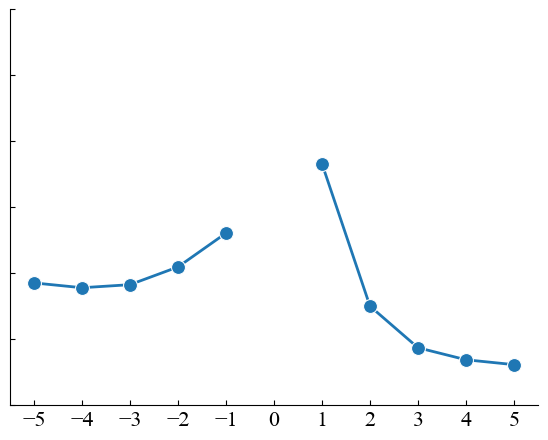

In [41]:
fig, ax = plt.subplots(figsize=(6,4.5))
fig.subplots_adjust(left=0.1, right=0.98, bottom=0.1, top=0.98)

ax.spines[['right', 'top']].set_visible(False)
ax.tick_params(axis="y",direction="in")
ax.tick_params(axis="x",direction="in")

sns.lineplot(data=df_ILIgp.query("-6 < pos_lag < 0"), x='pos_lag', y='ILI_prob', linewidth=2, marker='o', markersize = 10,color='C0')
sns.lineplot(data=df_ILIgp.query("0 < pos_lag < 6"), x='pos_lag', y='ILI_prob', linewidth=2, marker='o', markersize = 10,color='C0')
plt.ylim([0,0.3])
plt.xticks(ticks=np.arange(-5,6))
plt.xlabel('Lag')
plt.ylabel('Intrusion Conditional Response Probablility')
ax.set(xlabel=None, ylabel=None)
plt.tick_params(labelleft=False)

plt.savefig('simu7_fig/simu7_ILI.pdf')
plt.show()